## **朴素贝叶斯**

是一种基于概率的机器学习算法, 基于贝叶斯定理, 并且假设特征之间相互独立(这也是朴素的由来).实现简单, 训练和预测速度非常快, 在很多场景下都有很好的效果.

$$
P(Y \mid X) = \frac{P(X \mid Y)\, P(Y)}{P(X)}
$$

$P(Y \mid X)$:  后验概率

$P(X \mid Y)$:  条件概率

$P(Y)$:  先验概率

$P(X)$:  特征概率

想象一个场景, 我们要计算$P(X \mid Y)$, 这里X是一个矩阵, 那么想要计算这个条件概率就要去统计结果Y = Ci时Ci中X特征的出现频率.Y中出现X矩阵中所有的特征这个是一个概率很小的事件, 查找的过程很麻烦不好统计, 但是朴素贝叶斯假定了X矩阵中特征相互独立的关系, 那么条件概率的计算自然而然写成

$$
P(X_1, X_2, \ldots, X_n \mid Y)
= P(X_1 \mid Y)\, P(X_2 \mid Y)\, \cdots\, P(X_n \mid Y)
= \prod_{j=1}^{n} P(X_j \mid Y)
$$

极大的简化了条件概率的计算过程.



#### **训练**

朴素贝叶斯学习意味着去估计先验概率和条件概率, 这里可以应用极大似然估计来估计相应的概率

先验概率的极大似然估计:
$$
P(Y = C_k) = \frac{\sum_{i=1}^{N} I(y_i = C_k)}{N},\quad k = 1, 2, \ldots, K
$$

条件概率的极大似然估计:

$$
P(X_j = a_{jl} \mid Y = C_k)
= \frac{\sum_{i=1}^{N} I(x_{ji} = a_{jl},\, y_i = C_k)}
        {\sum_{i=1}^{N} I(y_i = C_k)},
\qquad
j = 1,2,\ldots,n;\;
l = 1,2,\ldots,L;\;
k = 1,2,\ldots,K
$$

这里的函数I是一个示性函数

#### **贝叶斯估计**

极大似然估计的出现会导致所要估计的概率值为0的情况, 会导致结果出现偏差, 解决办法就是替换为贝叶斯估计

先验概率的贝叶斯估计:

$$
P_{\lambda}(Y = C_k)
= \frac{\sum_{i=1}^{N} I(y_i = C_k) + \lambda}{N + K\lambda},
\qquad k = 1,2,\ldots,K
$$

条件概率的贝叶斯估计:
$$
P_{\lambda}(X_j = a_{jl} \mid Y = C_k)
= \frac{\sum_{i=1}^{N} I(x_{ji} = a_{jl},\, y_i = C_k) + \lambda}
       {\sum_{i=1}^{N} I(y_i = C_k) + L\lambda},
\qquad
j = 1,2,\ldots,n;\;
l = 1,2,\ldots,L;\;
k = 1,2,\ldots,K
$$

这里的$\lambda$是一个超参数, 一般取值为1, 取值为1时叫做拉普拉斯平滑

#### **朴素贝叶斯学习与分类的过程**

1. 学习时, 计算先验概率与条件概率:

$$
P(Y = C_k),\qquad k = 1,2,\ldots,K
$$

$$
P(X_j = a_{jl} \mid Y = C_k),\qquad
j = 1,2,\ldots,n;\;
l = 1,2,\ldots,L;\;
k = 1,2,\ldots,K
$$

2. 分类时, 根据新数据特征X = (x1, x2, x3, ..., xn)计算后验概率

$$
P(Y = C_k)\, \prod_{j=1}^{n} P(X_j = x_j \mid Y = C_k),
\qquad k = 1,2,\ldots,K
$$

3. 确定实例属于哪一个类型(计算Y为每一个类型的概率, 概率越大, 哪个类型越有可能, 那么就将Y归为这个类型)

$$
y = \arg\max_{C_k} \; P(Y = C_k) \prod_{j=1}^{n} P(X_j = x_j \mid Y = C_k), \quad k = 1,2,\ldots,K
$$
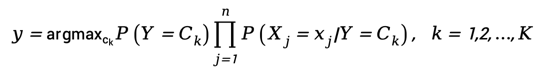